In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize
#EL PUNTO UNO FUE RESUELTO EN CLASE

**PUNTO 2**

In [2]:
v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [3]:
#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 
    
#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3

In [20]:
t = np.linspace(0, 20, 1000 ) # Nos piden 1000 registros del tiempo, así que por ello se pone el "1000", el intervalo de 0 a 20 es a elección propia
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params)
#Diccionario con las claves X,Y,y Tiempo
pos =  {"X": x ,"Y": y, "Tiempo": t}
#Transformar el diccionario a un DataFrame
df = pd.DataFrame.from_dict(pos)
print(df)


              X           Y    Tiempo
0      0.000000    0.000000   0.00000
1      0.848652    0.846989   0.02002
2      1.695854    1.689205   0.04004
3      2.541608    2.526653   0.06006
4      3.385914    3.359336   0.08008
..          ...         ...       ...
995  315.908872 -897.057712  19.91992
996  315.843561 -899.219473  19.93994
997  315.777714 -901.382998  19.95996
998  315.711332 -903.548284  19.97998
999  315.644416 -905.715329  20.00000

[1000 rows x 3 columns]


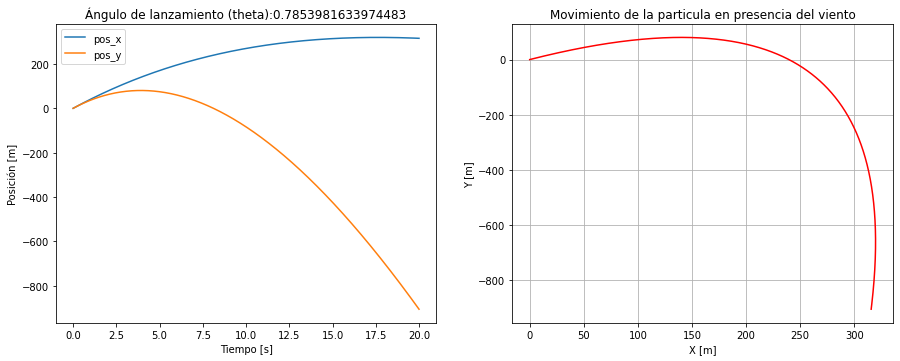

In [58]:
#Grafico
plt.figure(figsize=(15,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"],df["X"],label = "pos_x")
plt.plot(df["Tiempo"],df["Y"],label = "pos_y",)
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title("Ángulo de lanzamiento (theta):" + str(theta))
plt.legend()
#Grafico de movimiento de la particula
plt.subplot(122)
plt.plot(df["X"],df["Y"],"r-")
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title("Movimiento de la particula en presencia del viento")
plt.grid()
plt.show()

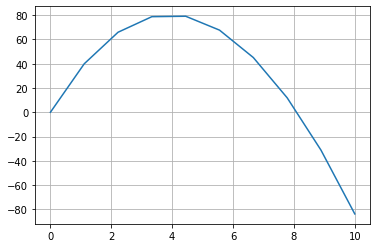

In [83]:
#Determinar el alcance máximo (máximo x) 
phi = np.pi/4 #El angulo que nos piden 45grados
time = lambda t0: (1./b)*(g/b + v0*np.sin(phi) - u*np.sin(alpha) ) * (1 - np.e**(- b * t0)) - (g / b - u *  np.sin(alpha))*t0 #Funcion de pos_y con y = 0
#GRáfico para guiarnos visualmente
k = np.linspace(0,10,10)
plt.figure()
plt.plot(k,time(k))
plt.grid()
plt.show()
#Encontrando la raiz que me sirve (no el cero), por el método de Newton
t_raiz = optimize.newton(time,10) # Encaja la raíz con el gráfico
#Ahora reemplazamos este t_raiz en la función pos_x para hallar el máximo
Rmax = pos_x(t_raiz, phi, *Params)


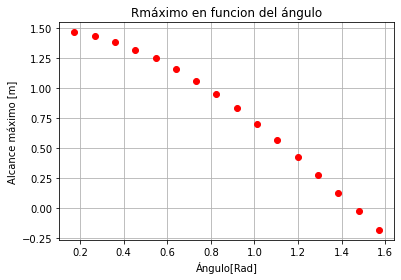

In [124]:
#Ahora haremos la grafica de alcance máximo variando el Theta

R_m = lambda angle: (u * t_raiz * np.cos(alpha) + (1./b)*(v0*np.cos(angle) - u*np.cos(alpha) ) * (1 - np.e**(-b*t_raiz))) / Rmax  #Funcion de x_pos reemplazando x por Rmax
h = (np.pi/180)#Para convertir a radianes
p = np.linspace(10*h,90*h,16) #El rango de angulos que nos piden (el 16 es para que se tome cada 5 grados)
plt.figure()
plt.plot(p,R_m(p),"ro")
plt.grid()
plt.xlabel("Ángulo[Rad]")
plt.ylabel("Alcance máximo [m]")
plt.title("Rmáximo en funcion del ángulo")
plt.show()

In [128]:
import Lagrange.Polynomial as LP
#Ahora haremos la interpolación para Rmax en funcion de theta

Pmax = LP.LagrangePolynomial(p,R_m(p)) 
iterador = np.linspace(0,100,100)
plt.figure()
plt.plot(iterador,Pmax(iterador),"go")
plt.grid()
plt.show()

ModuleNotFoundError: ignored